In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("hr-data.xlsx")

In [6]:
df.head()

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Gopal Venkata,Male,32,Average,2021-05-23,HR,45510,IND
4,Vasavi Veeravasarapu,Female,37,Poor,2020-09-11,Finance,115440,IND


### Business Problem
1. How many people are there in each department?
2. Gender distribution by department
3. Age spread of our staff (histogram)
4. Min / max / average salary in each department
5. Top earners in each country
6. Performance Spread (sort by column)
7. Company growth trend
8. Employee Filter (by starting letter)
9. Performance vs. Salary - is there any relationship?
10. India vs. New Zealand - quick scorecard

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         183 non-null    object        
 1   Gender       183 non-null    object        
 2   Age          183 non-null    int64         
 3   Rating       183 non-null    object        
 4   Date Joined  183 non-null    datetime64[ns]
 5   Department   183 non-null    object        
 6   Salary       183 non-null    int64         
 7   Country      183 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 11.6+ KB


In [9]:
df.isnull().sum()

Name           0
Gender         0
Age            0
Rating         0
Date Joined    0
Department     0
Salary         0
Country        0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [28]:
for cols in df.columns:
    print("\n","-"*20,cols.upper(),"-"*20)
    print(df[cols].value_counts())


 -------------------- NAME --------------------
Name
Parasuramudu Jamakayala    1
Esmaria Denecamp           1
Barr Faughny               1
Merrilee Plenty            1
Niall Selesnick            1
                          ..
Sawini Chandan             1
Baruna Ogale               1
Jagajeet Viraj             1
Kulbhushan Moorthy         1
Zach Polon                 1
Name: count, Length: 183, dtype: int64

 -------------------- GENDER --------------------
Gender
Male      92
Female    85
Other      6
Name: count, dtype: int64

 -------------------- AGE --------------------
Age
33    20
30    18
28    14
27    13
34    11
36    10
32    10
21    10
20     8
25     8
37     8
31     8
40     6
24     6
26     5
38     4
22     4
42     4
29     4
43     3
35     2
23     2
19     2
46     2
44     1
Name: count, dtype: int64

 -------------------- RATING --------------------
Rating
Average          137
Above average     20
Poor              16
Very poor          6
Exceptional        4

### How many people are there in each department
### Gender distribution by department

In [32]:
df.Department.value_counts()

Department
Procurement    55
Website        54
Finance        38
Sales          28
HR              8
Name: count, dtype: int64

In [57]:
pd.DataFrame(df.groupby('Department')['Gender'].value_counts())

count
Department  Gender       
Finance     Female     19
            Male       16
            Other       3
HR          Female      5
            Male        3
Procurement Male       32
            Female     23
Sales       Male       17
            Female     11
Website     Female     27
            Male       24
            Other       3

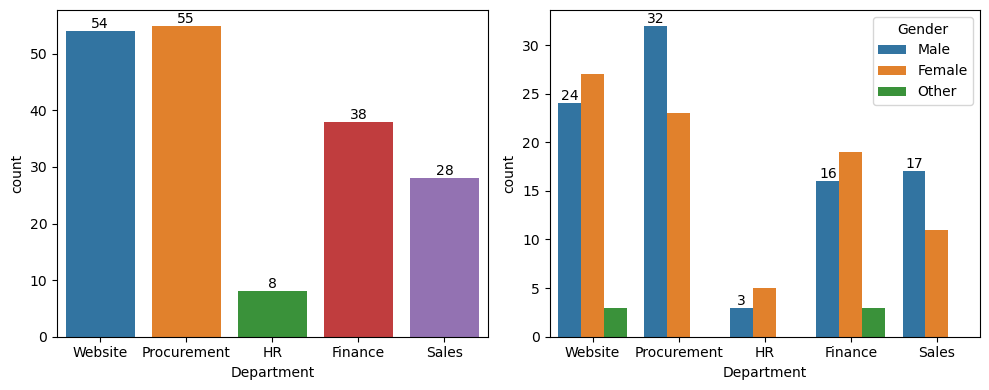

In [60]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
ax = sns.countplot(x=df.Department)
ax.bar_label(ax.containers[0])

plt.subplot(1,2,2)
ax = sns.countplot(x=df.Department, hue= df.Gender)
ax.bar_label(ax.containers[0])

plt.tight_layout()

### Age spread of our staff (histogram)

<Axes: xlabel='Age', ylabel='Count'>

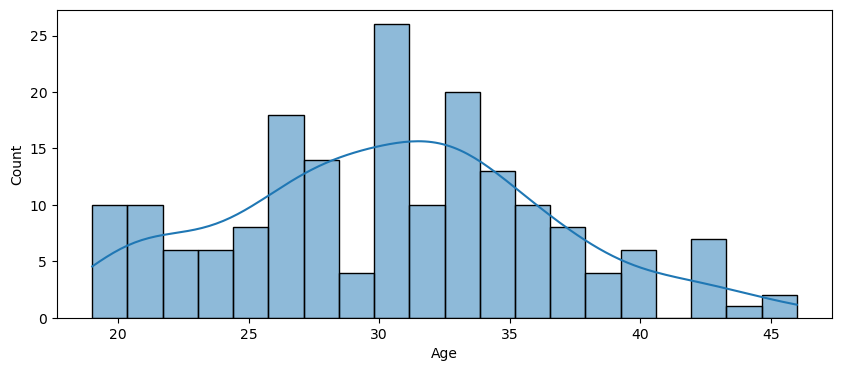

In [83]:
plt.figure(figsize=(10,4))
sns.histplot(df.Age, kde = True, bins=20)

### Min / max / average salary in each department

In [120]:
min = list(df.groupby('Department')['Salary'].min())
max = list(df.groupby('Department')['Salary'].max())
avg = list(df.groupby('Department')['Salary'].mean())
name = list(df.groupby('Department')['Salary'].mean().index)

In [121]:
min,max,avg

([48170, 45510, 37920, 36040, 33920],
 [115440, 119110, 115920, 112780, 118840],
 [72472.63157894737, 89650.0, 81794.0, 67866.42857142857, 78753.70370370371])

In [123]:
data = pd.DataFrame({'name':name, 'minmum':min,'maximum':max,'Average':avg})

In [124]:
data

,name,minmum,maximum,Average
0,Finance,48170,115440,72472.631579
1,HR,45510,119110,89650.000000
2,Procurement,37920,115920,81794.000000
3,Sales,36040,112780,67866.428571
4,Website,33920,118840,78753.703704


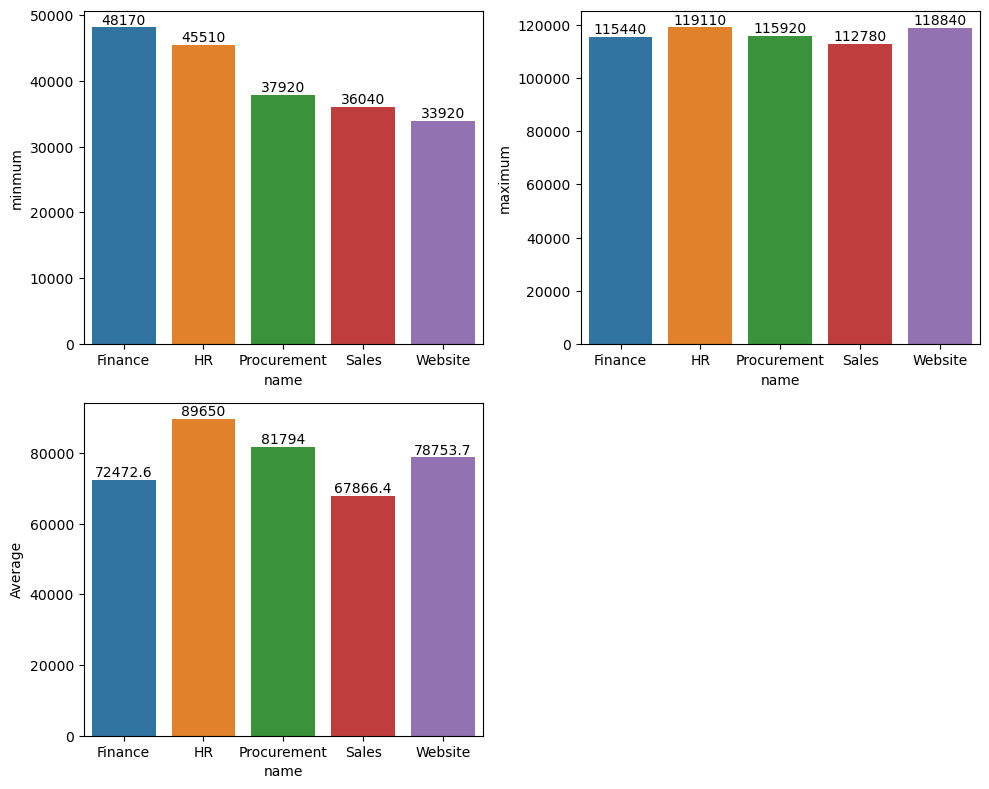

In [145]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
ax = sns.barplot(x=data.name, y = data.minmum, data= data)
ax.bar_label(ax.containers[0])

plt.subplot(2,2,2)
ax = sns.barplot(x=data.name, y = data.maximum, data= data)
ax.bar_label(ax.containers[0])

plt.subplot(2,2,3)
ax = sns.barplot(x=data.name, y = data.Average, data= data)
ax.bar_label(ax.containers[0])


plt.tight_layout()

### Top earners in each country

In [172]:
df.head(4)

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Gopal Venkata,Male,32,Average,2021-05-23,HR,45510,IND


In [171]:
df.groupby(['Country'])['Salary'].mean()

Country
IND    77366.521739
NZ     76978.791209
Name: Salary, dtype: float64

In [161]:
df.groupby(['Country','Department'])['Salary'].mean()

Country  Department 
IND      Finance        72472.631579
         HR             89650.000000
         Procurement    82345.000000
         Sales          67866.428571
         Website        78753.703704
NZ       Finance        72472.631579
         HR             89650.000000
         Procurement    81222.592593
         Sales          67866.428571
         Website        78753.703704
Name: Salary, dtype: float64

### Performance Spread (sort by column)

In [173]:
df.head(3)

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND


In [174]:
df.Rating.value_counts()

Rating
Average          137
Above average     20
Poor              16
Very poor          6
Exceptional        4
Name: count, dtype: int64